In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
import pandas as pd
import numpy as np

import matplotlib as mpl
from scipy.stats import ttest_ind

# Plot benchmark when distortion level = 5

In [2]:
res_df = pd.read_pickle('./results/nonrigid_benchmark_results/Fixed_distort_stats.pkl')
sagittal_GT = 0.017661
well_GT = 0.023275161

In [3]:
methods = ['PASTE', 'PASTE2', 'Moscot_rigid', 'Moscot_nonrigid', 'SLAT', 'SLAT_GT', 'STAlign', 'STAlign_prealign', 'SPACEL', 'Spateo', ]
my_palette = sns.color_palette('Paired')[0:4]+sns.color_palette('Paired')[4:6]+sns.color_palette('Paired')[6:8]+sns.color_palette('Paired')[11:12] + [np.array([157,60,135]) / 255]

C:\Users\lyf04\AppData\Local\Temp\ipykernel_12996\3910480145.py:13: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.6}` instead.

  g = sns.barplot(
C:\Users\lyf04\AppData\Local\Temp\ipykernel_12996\3910480145.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['PASTE', 'PASTE2', 'Moscot-R', 'Moscot-N', 'SLAT', 'SLAT-GT', 'STAlign', 'STAlign-GT', 'SPACEL', 'Spateo'])


SPACEL - Spateo: p-value:1.1810153393080518e-07
STAlign_prealign - Spateo: p-value:1.9109590432550233e-05


C:\Users\lyf04\AppData\Local\Temp\ipykernel_12996\3910480145.py:63: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.6}` instead.

  sns.barplot(


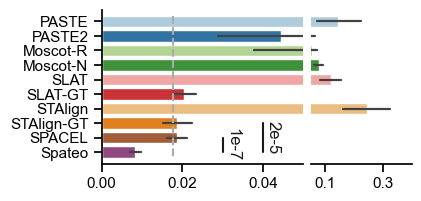

In [4]:
sns.set_theme(style="ticks")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams.update({'text.color': COLOR,
                     'axes.labelcolor': COLOR})

fig, axs = plt.subplots(1,2, figsize=(4,2), gridspec_kw={'wspace':0.05, 'width_ratios': [1,0.5]})

# Plotting sagittal data part1
g = sns.barplot(
    x="mae",
    y="Method",
    hue="Method",
    data=res_df[res_df['dataset'] == 'sagittal'],
    ax=axs[0],
    palette=my_palette,
    errwidth=1.6,
    order=methods,
    hue_order=methods
)

axs[0].spines['bottom'].set_color(COLOR)
axs[0].spines['top'].set_color(COLOR)
axs[0].spines['right'].set_color(COLOR)
axs[0].spines['left'].set_color(COLOR)
axs[0].set_yticklabels(['PASTE', 'PASTE2', 'Moscot-R', 'Moscot-N', 'SLAT', 'SLAT-GT', 'STAlign', 'STAlign-GT', 'SPACEL', 'Spateo'])
axs[0].set_xlim([0,0.05])
axs[0].set_xlabel('', color='black')
axs[0].set_ylabel('', color='black')
axs[0].set_title('')
axs[0].set_ylim([9.8, -0.8])
axs[0].plot([sagittal_GT, sagittal_GT], [-0.4, 9.5], color=np.array([170, 171, 171]) / 255, linestyle='--', lw=1.5)

# add significance
y = 0.03
text_interval = 0.03 * 0.08
h = 0.02
x1 = 8
x2 = 9
group1 = res_df[(res_df['dataset'] == 'sagittal') & (res_df['Method'] == methods[x1])]['mae']
group2 = res_df[(res_df['dataset'] == 'sagittal') & (res_df['Method'] == methods[x2])]['mae']
t_stat, p_val = ttest_ind(group1, group2)
print(f'{methods[x1]} - {methods[x2]}: p-value:{p_val}')
axs[0].plot([y, y], [x1, x2], lw=1.5, c='k')
axs[0].text(y + text_interval, (x1 + x2) * .5, '1e-7', ha='center', va='center', c='k', rotation=-90)


y = 0.04
h = 0.02
x1 = 7
x2 = 9
group1 = res_df[(res_df['dataset'] == 'sagittal') & (res_df['Method'] == methods[x1])]['mae']
group2 = res_df[(res_df['dataset'] == 'sagittal') & (res_df['Method'] == methods[x2])]['mae']
t_stat, p_val = ttest_ind(group1, group2)
axs[0].plot([y, y], [x1, x2], lw=1.5, c='k')
axs[0].text(y+text_interval, (x1 + x2) * .5, '2e-5', ha='center', va='center', c='k', rotation=-90)
print(f'{methods[x1]} - {methods[x2]}: p-value:{p_val}')

# Plotting sagittal data part2
sns.barplot(
    x="mae",
    y="Method",
    hue="Method",
    data=res_df[res_df['dataset'] == 'sagittal'],
    ax=axs[1],
    palette=my_palette,
    errwidth=1.6,
    order=methods,
    hue_order=methods
)
axs[1].set_xlabel('', color='black')
axs[1].set_title('')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xticks([0.1,0.3])
axs[1].spines['bottom'].set_color(COLOR)
axs[1].spines['top'].set_color(COLOR)
axs[1].spines['right'].set_color(COLOR)
axs[1].spines['left'].set_color(COLOR)
axs[1].set_ylabel('', color='black')
axs[1].set_xlim([0.05,0.4])
axs[1].set_ylim([9.8, -0.8])
sns.despine(ax=axs[0])
sns.despine(ax=axs[1], left=True)
# plt.savefig('./figures/nonrigid_benchmark/fix_distort_level_part1.pdf', dpi=300, bbox_inches='tight', transparent=True)

C:\Users\lyf04\AppData\Local\Temp\ipykernel_12996\3160132870.py:13: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.6}` instead.

  g = sns.barplot(


SPACEL - Spateo: p-value:1.400577988324044e-06
STAlign_prealign - Spateo: p-value:3.6008397858483224e-13


C:\Users\lyf04\AppData\Local\Temp\ipykernel_12996\3160132870.py:64: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.6}` instead.

  sns.barplot(


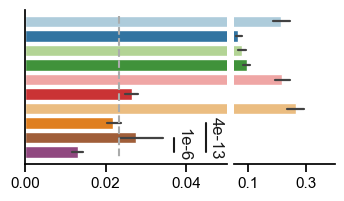

In [5]:
sns.set_theme(style="ticks")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams.update({'text.color': COLOR,
                     'axes.labelcolor': COLOR})

fig, axs = plt.subplots(1,2, figsize=(4,2), gridspec_kw={'wspace':0.05, 'width_ratios': [1,0.5]})

# Plotting well data part1
g = sns.barplot(
    x="mae",
    y="Method",
    hue="Method",
    data=res_df[res_df['dataset'] == 'well'],
    ax=axs[0],
    palette=my_palette,
    errwidth=1.6,
    order=methods,
    hue_order=methods
)

axs[0].spines['bottom'].set_color(COLOR)
axs[0].spines['top'].set_color(COLOR)
axs[0].spines['right'].set_color(COLOR)
axs[0].spines['left'].set_color(COLOR)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xlim([0,0.05])
axs[0].set_xlabel('', color='black')
axs[0].set_ylabel('', color='black')
axs[0].set_title('')
axs[0].set_ylim([9.8, -0.8])
axs[0].plot([well_GT, well_GT],  [-0.4, 9.5], color=np.array([170, 171, 171]) / 255, linestyle='--', lw=1.5)

# add significance
y = 0.037
text_interval = 0.03 * 0.08
h = 0.02
x1 = 8
x2 = 9
group1 = res_df[(res_df['dataset'] == 'well') & (res_df['Method'] == methods[x1])]['mae']
group2 = res_df[(res_df['dataset'] == 'well') & (res_df['Method'] == methods[x2])]['mae']
t_stat, p_val = ttest_ind(group1, group2)
print(f'{methods[x1]} - {methods[x2]}: p-value:{p_val}')
axs[0].plot([y, y], [x1, x2], lw=1.5, c='k')
axs[0].text(y + text_interval, (x1 + x2) * .5, '1e-6', ha='center', va='center', c='k', rotation=-90)


y = 0.045
h = 0.02
x1 = 7
x2 = 9
group1 = res_df[(res_df['dataset'] == 'well') & (res_df['Method'] == methods[x1])]['mae']
group2 = res_df[(res_df['dataset'] == 'well') & (res_df['Method'] == methods[x2])]['mae']
t_stat, p_val = ttest_ind(group1, group2)
axs[0].plot([y, y], [x1, x2], lw=1.5, c='k')
axs[0].text(y+text_interval, (x1 + x2) * .5, '4e-13', ha='center', va='center', c='k', rotation=-90)
print(f'{methods[x1]} - {methods[x2]}: p-value:{p_val}')

# Plotting well data part2
sns.barplot(
    x="mae",
    y="Method",
    hue="Method",
    data=res_df[res_df['dataset'] == 'well'],
    ax=axs[1],
    palette=my_palette,
    errwidth=1.6,
    order=methods,
    hue_order=methods
)

axs[1].set_xlabel('', color='black')
axs[1].set_title('')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylim([9.8, -0.8])
axs[1].set_xticks([0.1,0.3])
axs[1].spines['bottom'].set_color(COLOR)
axs[1].spines['top'].set_color(COLOR)
axs[1].spines['right'].set_color(COLOR)
axs[1].spines['left'].set_color(COLOR)
axs[1].set_ylabel('', color='black')
axs[1].set_xlim([0.05,0.4])

sns.despine(ax=axs[0])
sns.despine(ax=axs[1], left=True)
# plt.tight_layout()
# plt.savefig('./figures/nonrigid_benchmark/fix_distort_level_part2.pdf', dpi=300, bbox_inches='tight', transparent=True)

# Plot benchmark results with respect to different distortion level

In [6]:
res_df = pd.read_pickle('./results/nonrigid_benchmark_results/Differ_distort_stats.pkl')
res_df['is_GT'] = 0
res_df.loc[res_df['Method'] == 'GTRotation', 'is_GT'] = 1

In [7]:
methods = ['Spateo', 'PASTE', 'PASTE2', 'Moscot_rigid', 'Moscot_nonrigid', 'SLAT','SLAT_GT','STAlign_wo_prealign', 'STAlign_prealign', 'SPACEL', 'GTRotation']
my_palette = [np.array([157,60,135]) / 255] + sns.color_palette('Paired')[0:4]+sns.color_palette('Paired')[4:6]+sns.color_palette('Paired')[6:8]+sns.color_palette('Paired')[11:12]+[np.array([170,171,171])/255]

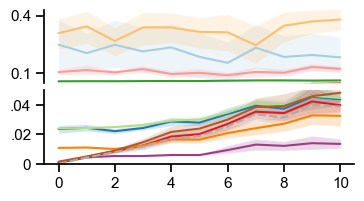

In [8]:
import matplotlib as mpl
sns.set_theme(style="ticks")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams.update({'text.color' : COLOR,
                     'axes.labelcolor' : COLOR})
fig, axs = plt.subplots(2,1,figsize=(4,2), gridspec_kw={'hspace':0.1})
ax = axs[0]
sns.set_theme(style="ticks")
g = sns.lineplot(
    x="distort_level", 
    y="mae",
    hue="Method",
    data=res_df,
    ax=ax,
    err_kws={'edgecolor': None},
    legend=False,
    style='is_GT',
    hue_order=methods,
    palette=my_palette,
)

ax.spines['bottom'].set_color(COLOR)
ax.spines['top'].set_color(COLOR) 
ax.spines['right'].set_color(COLOR)
ax.spines['left'].set_color(COLOR)
sns.despine(top=True, right=True)

ax.set_xlabel('', color='black')
ax.set_ylabel('', color='black')
ax.set_ylim(0.05,0.43)
ax.set_xticks([])
ax.set_yticks([0.1,0.4])
ax.set_yticklabels(["0.1", "0.4"])
ax = axs[1]
sns.set_theme(style="ticks")
overlap_ratio = 0.5
g = sns.lineplot(
    x="distort_level", 
    y="mae",
    hue="Method",
    data=res_df,
    ax=ax,
    err_kws={'edgecolor': None},
    legend=False,
    style='is_GT',
    hue_order=methods,
    palette=my_palette,
)

ax.spines['bottom'].set_color(COLOR)
ax.spines['top'].set_color(COLOR) 
ax.spines['right'].set_color(COLOR)
ax.spines['left'].set_color(COLOR)
sns.despine(top=True, right=True)

ax.set_xlabel('', color='black')
ax.set_ylabel('', color='black')
ax.set_ylim(0,0.05)
ax.set_yticks([0,0.02,0.04])
ax.set_yticklabels(["0", ".02", ".04"])
sns.despine(ax=axs[0], bottom=True)
sns.despine(ax=axs[1])
# plt.savefig('./figures/nonrigid_benchmark/Different_distort_level.pdf', dpi=300, bbox_inches='tight', transparent=True)